# Iris Dataset

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Mitchell-Mirano/sorix/blob/main/docs/examples/clustering/Iris-dataset.ipynb)
[![Open in GitHub](https://img.shields.io/badge/Open%20in-GitHub-black?logo=github)](https://github.com/Mitchell-Mirano/sorix/blob/main/docs/examples/clustering/Iris-dataset.ipynb)
[![Open in Docs](https://img.shields.io/badge/Open%20in-Docs-blue?logo=readthedocs)](http://127.0.0.1:8000/examples/clustering/Iris-dataset)

In [1]:
#Uncomment the next line and run this cell to install sorix
#!pip install 'sorix @ git+https://github.com/Mitchell-Mirano/sorix.git@main'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sorix.clustering import Kmeans
from sorix import tensor

In [3]:
data=pd.read_csv("../data/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data['labels'] = data.Species.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,labels
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


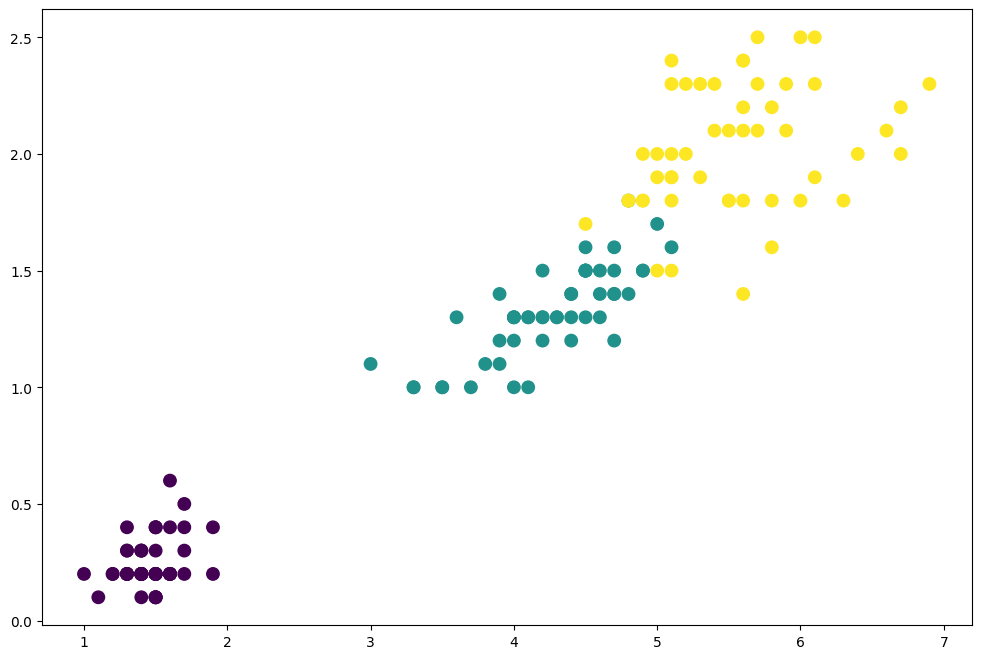

In [5]:
plt.figure(figsize=(12,8))
plt.scatter(data['PetalLengthCm'],data['PetalWidthCm'],s=80, c=data['labels'])

In [6]:
X=data[['PetalLengthCm','PetalWidthCm','PetalLengthCm','PetalWidthCm']]
X = tensor(X)
X

tensor([[1.4, 0.2, 1.4, 0.2],
        [1.4, 0.2, 1.4, 0.2],
        [1.3, 0.2, 1.3, 0.2],
        [1.5, 0.2, 1.5, 0.2],
        [1.4, 0.2, 1.4, 0.2],
        [1.7, 0.4, 1.7, 0.4],
        [1.4, 0.3, 1.4, 0.3],
        [1.5, 0.2, 1.5, 0.2],
        [1.4, 0.2, 1.4, 0.2],
        [1.5, 0.1, 1.5, 0.1],
        [1.5, 0.2, 1.5, 0.2],
        [1.6, 0.2, 1.6, 0.2],
        [1.4, 0.1, 1.4, 0.1],
        [1.1, 0.1, 1.1, 0.1],
        [1.2, 0.2, 1.2, 0.2],
        [1.5, 0.4, 1.5, 0.4],
        [1.3, 0.4, 1.3, 0.4],
        [1.4, 0.3, 1.4, 0.3],
        [1.7, 0.3, 1.7, 0.3],
        [1.5, 0.3, 1.5, 0.3],
        [1.7, 0.2, 1.7, 0.2],
        [1.5, 0.4, 1.5, 0.4],
        [1. , 0.2, 1. , 0.2],
        [1.7, 0.5, 1.7, 0.5],
        [1.9, 0.2, 1.9, 0.2],
        [1.6, 0.2, 1.6, 0.2],
        [1.6, 0.4, 1.6, 0.4],
        [1.5, 0.2, 1.5, 0.2],
        [1.4, 0.2, 1.4, 0.2],
        [1.6, 0.2, 1.6, 0.2],
        [1.6, 0.2, 1.6, 0.2],
        [1.5, 0.4, 1.5, 0.4],
        [1.5, 0.1, 1.5, 0.1],
        [1

In [7]:
model= Kmeans(n_clusters=3)
model.fit(X)

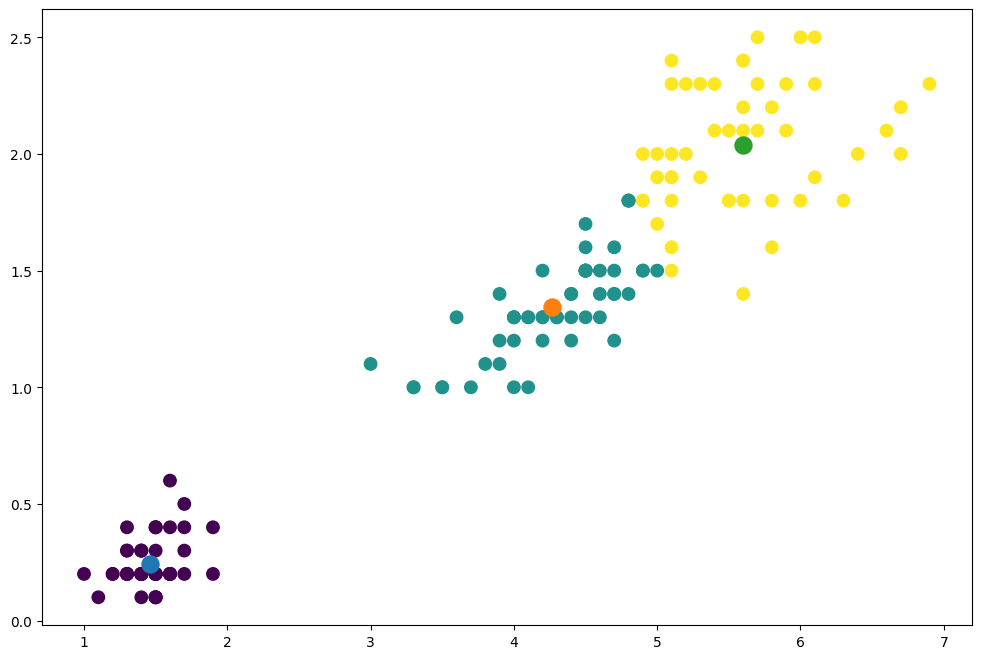

In [8]:
pred_labels = model.predict(X)
plt.figure(figsize=(12,8))
plt.scatter(data['PetalLengthCm'],data['PetalWidthCm'],s=80, c=pred_labels)

for centroid in model.centroids:
    plt.scatter(centroid[0],centroid[1], s=150)

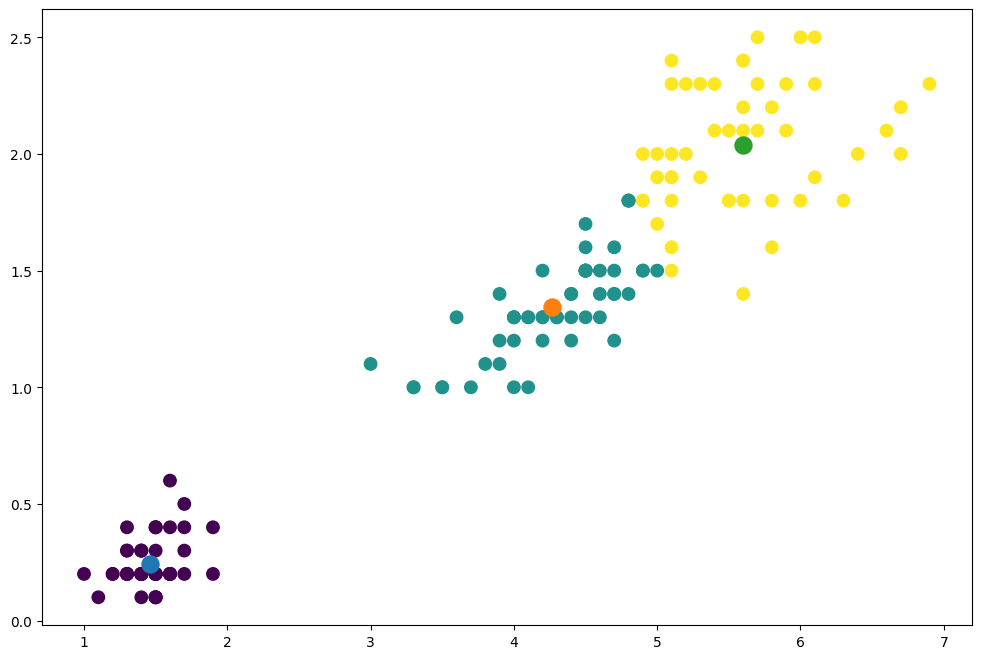

In [9]:
pred_labels = model.predict(X)
plt.figure(figsize=(12,8))
plt.scatter(data['PetalLengthCm'],data['PetalWidthCm'],s=80, c=pred_labels)

for centroid in model.centroids:
    plt.scatter(centroid[0],centroid[1], s=150)

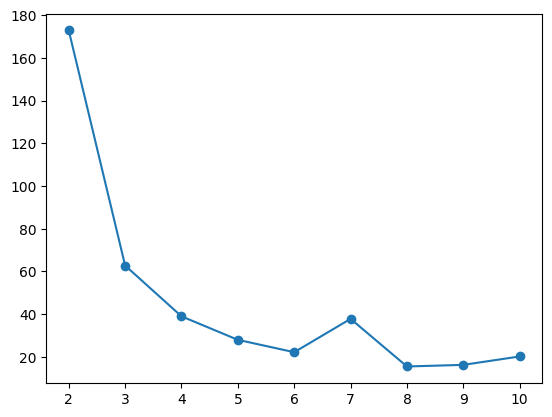

In [10]:
inertias = []

for i in range(2,11):
    model = Kmeans(n_clusters=i)
    model.fit(X)
    inertias.append(model.get_inertia(X))

import matplotlib.pyplot as plt
plt.plot(range(2,11), inertias, marker='o')